In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# pip install scikit-learn==1.3.0

In [2]:
import sklearn
print(sklearn.__version__)
# Luego de usar el LazyRegressor podemos  actualizar a la última versión
# pip install --upgrade scikit-learn

1.3.0


In [3]:
# Cargamos el df
df = pd.read_csv('df_autos_final(sin-gama-alta).csv', sep=',')
df

,Título,Ubicación,Versión,Color,Marca,Modelo,Año,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Kilómetros,Dirección,Control de tracción,Capacidad de personas,Potencia,Precio
0,Peugeot 206 1.6 Xs Premium,Bs.As. G.B.A. Oeste,1.6 Xs Premium,NaN,Peugeot,206,2007,Nafta,3.0,Manual,1.6,Hatchback,126000.0,Hidráulica,4x2,5.0,90.0,5500.0
1,Peugeot 206 1.6 Xs Premium,Bs.As. G.B.A. Oeste,1.6 Xs Premium,NaN,Peugeot,206,2005,Nafta,3.0,Manual,1.6,Hatchback,186000.0,Hidráulica,4x2,5.0,90.0,6000.0
2,Peugeot 206 1.6 Xs Premium,Ubicación no encontrada,1.6 Xs Premium,NaN,Peugeot,206,2006,Nafta,3.0,Manual,1.6,Hatchback,145000.0,Hidráulica,4x2,5.0,90.0,5500.0
3,Peugeot 206 1.6 Xs Premium,Bs.As. G.B.A. Norte,1.6 Xs Premium,Gris,Peugeot,206,2007,Nafta,3.0,Manual,1.6,Hatchback,184000.0,Hidráulica,4x2,5.0,90.0,6100.0
4,Peugeot 206 1.9 Xrd Premium 5 p,Bs.As. G.B.A. Sur,1.9 Xrd Premium 5 p,NaN,Peugeot,206,2005,Diésel,5.0,Manual,1.9,Hatchback,283000.0,Hidráulica,4x2,5.0,70.0,4300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35853,Volkswagen Vento 1.9 I Advance,Ubicación no encontrada,1.9 I Advance,NaN,Volkswagen,Vento,2008,Diésel,4.0,Manual,1.9,Sedán,200000.0,Eléctrica,4x2,5.0,105.0,8500.0
35854,Volkswagen Vento 2.0 Tsi Gli 211cv App Connect...,Ubicación no encontrada,NaN,Gris,Volkswagen,Vento,2016,Nafta,4.0,Manual,2.0,Sedán,78000.0,Hidráulica,4x2,5.0,211.0,22000.0
35855,Volkswagen Vento 1.4 Comfortline 150cv At,Córdoba,1.4 Comfortline 150cv At,Blanco,Volkswagen,Vento,2019,Nafta,4.0,Automática,1.4,Sedán,85000.0,Eléctrica,4x2,5.0,150.0,21000.0
35856,Volkswagen Vento 2.0 Sportline Tsi 200cv Bi-xenon,Bs.As. G.B.A. Oeste,2.0 Sportline Tsi 200cv Bi-xenon,Gris,Volkswagen,Vento,2014,Nafta,4.0,Manual,2.0,Sedán,117000.0,Eléctrica,4x2,5.0,200.0,14600.0


In [4]:
# Transformamos las variables categóricas en ficticias 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Extraemos las columnas que no vamos a transformar
x = df.drop(['Precio', 'Título', 'Ubicación', 'Versión', 'Color', 'Marca'], axis=1)
y = df['Precio']

# Identificamos las columnas categóricas en x
categorical_columns = x.select_dtypes(include=['object']).columns

# Aplicamos LabelEncoder a estas columnas
labelencoder = LabelEncoder()

for col in categorical_columns:
    x[col] = labelencoder.fit_transform(x[col])

# Aplicamos OneHotEncoder a todas las columnas categóricas con drop='first' para evitar caer en la trampa de las variables ficticias
onehotencoder = OneHotEncoder(drop='first', sparse_output=False) 
onehot_encoded = onehotencoder.fit_transform(x[categorical_columns])

# Convertimos el resultado a DataFrame para mejor manejo
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehotencoder.get_feature_names_out(categorical_columns))

# Concatenamos el DataFrame original (sin las columnas transformadas) con el DataFrame de las variables ficticias
x = pd.concat([x.drop(categorical_columns, axis=1).reset_index(drop=True), onehot_encoded_df], axis=1)
x

,Año,Puertas,Motor,Kilómetros,Capacidad de personas,Potencia,Modelo_1,Modelo_2,Modelo_3,Modelo_4,...,Tipo de carrocería_1,Tipo de carrocería_2,Tipo de carrocería_3,Tipo de carrocería_4,Tipo de carrocería_5,Tipo de carrocería_6,Dirección_1,Dirección_2,Dirección_3,Control de tracción_1
0,2007,3.0,1.6,126000.0,5.0,90.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2005,3.0,1.6,186000.0,5.0,90.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2006,3.0,1.6,145000.0,5.0,90.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2007,3.0,1.6,184000.0,5.0,90.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2005,5.0,1.9,283000.0,5.0,70.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35853,2008,4.0,1.9,200000.0,5.0,105.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
35854,2016,4.0,2.0,78000.0,5.0,211.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
35855,2019,4.0,1.4,85000.0,5.0,150.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
35856,2014,4.0,2.0,117000.0,5.0,200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [6]:
# ACORDARSE DE ELIMINAR SIEMPRE LA ÚLTIMA DUMMY DE CADA TIPO, CUYO VALOR EN CASO DE AUSENCIA DE TODAS LAS DUMMYS 
# SE VERÍA REFLEJADO EN O.O (en este caso, para cada subtimo dummy eliminada, el coef nos indicaría el grado de aporte al precio 
# de la característica en comparación con la columna eliminada de su subtipo)                                                                                            

In [17]:
# Dividimos en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # cambiar el Random_State para variar los autos recomendados

In [8]:
# Vemos los modelos base recomendados
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
# Usar LazyPredict para obtener los modelos base recomendados
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [26:08<00:00, 37.35s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 28686, number of used features: 64
[LightGBM] [Info] Start training from score 13808.935961


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.88,0.88,2776.12,0.34
HistGradientBoostingRegressor,0.87,0.88,2792.04,1.08
XGBRegressor,0.87,0.87,2842.31,0.47
GradientBoostingRegressor,0.87,0.87,2885.74,3.50
PoissonRegressor,0.86,0.86,2951.19,0.27
KNeighborsRegressor,0.86,0.86,2954.24,0.85
MLPRegressor,0.86,0.86,2979.36,18.72
RandomForestRegressor,0.85,0.86,3004.19,19.06
BaggingRegressor,0.85,0.85,3032.49,2.07


In [9]:
# Sin CPA, el XGBoost Regressor está entre los primeros algoritmos recomendados para el set de datos con todas las variables X 
# (si podemos mantener este resultado mejor xq si necesitamos aplicar CPA perdemos noción de los valores de predicción con el estandarizado)
# Puedo probar también variando el nivel de división por train/test e incluso ponderar diferentes resultados de random_state
# A pesar de la varianza por random_state, puedo ver que los modelos recomendados siguen siendo los mismos

In [6]:
# Para reducir dimensión con PCA, las variables deben estar reescaladas 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# Aplicar reducción de dimensionalidad con PCA 
pca = PCA(n_components = 10) # número de componentes a obtener (cuantas direcciones de la varianza son las que deseo quedarme). Si ponemos None, me toma todos como componentes, pudiendo analizar el porcentaje de varianza que explica cada una (y luego poder redefinir el número)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance.sum()) # varianza explicada por las componentes principales

# Vemos los modelos base recomendados con las 10,20,30,40,50 PCA
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
# Usar LazyPredict para obtener los modelos base recomendados
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

0.3720477630023943


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [23:18<00:00, 33.29s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 28686, number of used features: 10
[LightGBM] [Info] Start training from score 13808.935961


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.87,0.87,2808.70,16.68
HistGradientBoostingRegressor,0.86,0.86,2919.21,0.56
LGBMRegressor,0.86,0.86,2929.39,0.20
XGBRegressor,0.86,0.86,2988.30,0.41
KNeighborsRegressor,0.86,0.86,2998.70,0.21
RandomForestRegressor,0.84,0.84,3126.00,85.57
GradientBoostingRegressor,0.84,0.84,3144.07,22.96
BaggingRegressor,0.81,0.81,3421.46,8.47
MLPRegressor,0.81,0.81,3489.77,13.60


In [ ]:
# Con 10 CP, ExtraTrees
# Con 20 CP, ExtraTrees gana relevancia en la predicción al igual que Random Forest 
# Con 30 CP, ExtraTrees, K-Neighbors Regressor
# Con 40 CP, se sigue privilegiando al algoritmo de XGBoost
# Con 50 CP, se sigue privilegiando al algoritmo de XGBoost
# Ninguna mejora sustancial con respecto a XGBoost sin CP, por lo que aplicaremos esta, sin escalado previo

In [18]:
# Modelo Base de XGBoost Regressor
from xgboost import XGBRegressor
regressor_base = XGBRegressor()
regressor_base.fit(X_train, y_train)
print(regressor_base.get_params())

# Hacer predicciones con el modelo base
y_pred_base = regressor_base.predict(X_test)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [19]:
# Aplicar mejora de Grid Search para optimizar el modelo y sus parámetros
from sklearn.model_selection import GridSearchCV # cross-validation
parameters = [{ 'learning_rate': [0.15], 'max_depth':[8], 'min_child_weight':[0], 'reg_lambda':[2.7], 'max_bin':[512]}] 
grid_search = GridSearchCV(estimator = regressor_base, # estimator: modelo de aprerndizaje q queremos buscar parámetros óptimos
                          param_grid = parameters, # param_grid: rango de parámetros a buscar el óptimo
                          scoring = 'neg_mean_squared_error', # métrica sobre la cual basará la búsqueda
                          cv = 10, # cv: usa validación cruzada para darme un resultado más válido del rendimiento del modelo. 10 folds usa 
                          n_jobs = -1) # n_jobs: poniéndole -1 le indicamos que tome todos los cores posibles de nuestro pc para realizar la búsqueda, menos el del sist operativo (para grandes bases de datos) 
grid_search = grid_search.fit(X_train,y_train) # entrenamos el modelo según los parámetros óptimos conseguidos por GridSearch
best_accuracy = grid_search.best_score_
print(best_accuracy) # la precisión de la mejor combinación posible
best_parameters = grid_search.best_params_
print(best_parameters)

# Hacer predicciones con el modelo optimizado
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

-9356332.823949154
{'learning_rate': 0.15, 'max_bin': 512, 'max_depth': 8, 'min_child_weight': 0, 'reg_lambda': 2.7}


In [20]:
# Comparar los resultados de ambos modelos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Número de muestras y predictores
n = X_test.shape[0]
k = X_test.shape[1]

# Evaluar el modelo base
mae_base = mean_absolute_error(y_test, y_pred_base)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_test, y_pred_base)
r2_base_adjusted = 1 - (1 - r2_base) * (n - 1) / (n - k - 1)

# Evaluar el modelo optimizado
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)
r2_best_adjusted = 1 - (1 - r2_best) * (n - 1) / (n - k - 1)

# Imprimir los resultados
print("Modelo Base:")
print(f"MAE: {mae_base}")
print(f"MSE: {mse_base}")
print(f"RMSE: {rmse_base}")
print(f"R2: {r2_base}")
print(f"R2 Ajustado: {r2_base_adjusted}")

print("\nModelo Optimizado:")
print(f"MAE: {mae_best}")
print(f"MSE: {mse_best}")
print(f"RMSE: {rmse_best}")
print(f"R2: {r2_best}")
print(f"R2 Ajustado: {r2_best_adjusted}")

Modelo Base:
MAE: 1724.0898188682168
MSE: 9442791.967544101
RMSE: 3072.9126195751323
R2: 0.8640523231588795
R2 Ajustado: 0.8628280863053784

Modelo Optimizado:
MAE: 1702.51106706882
MSE: 8956113.736584524
RMSE: 2992.6766842718785
R2: 0.8710590193876547
R2 Ajustado: 0.8698978792780178


In [9]:
# Guardar los índices originales de los datos de prueba
test_indices = X_test.index
# Asegúrate de que los índices de X_test coincidan con el DataFrame original
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Añadir las predicciones al DataFrame original
df_test = df.loc[X_test.index]  
df_test = df_test.reset_index(drop=True)
df_test['precio_real'] = y_test
df_test['precio_pred'] = y_pred_best

# Añadir la columna de diferencia
df_test['diferencia'] = df_test['precio_pred'] - df_test['precio_real']

# Filtrar y ordenar
df_filtrado = df_test[df_test['precio_pred'] > df_test['precio_real']]
df_filtrado_ordenado = df_filtrado.sort_values(by='diferencia', ascending=False)

# Mostrar las primeras 20 filas
df_resultado = df_filtrado_ordenado.head(20)

df_resultado

# Vemos los 20 autos más rentables en relación con las predicciones del modelo, como sólo tomamos el 20% de los datos 
# para predecir (test), lo correcto es cambiar la semilla de la división en train/test para ver si cabe la posibilidad 
# de que aparezcan nuevas publicaciones en el top.
# También podemos filtrar esta búsqueda por modelo, Ubicación, y demás características que nos resulten relevantes para la compra 
# (por ej podemos filtrar la búsqueda para que nos muestre los 20 autos más rentables pero que sean más baratos que 20000 en su valor real)

,Título,Ubicación,Versión,Color,Marca,Modelo,Año,Tipo de combustible,Puertas,Transmisión,...,Tipo de carrocería,Kilómetros,Dirección,Control de tracción,Capacidad de personas,Potencia,Precio,precio_real,precio_pred,diferencia
4295,Peugeot 308 1.6 Sport Thp 163cv,Bs.As. G.B.A. Sur,1.6 Sport Thp 163cv,NaN,Peugeot,308,2014,Nafta,5.0,Automática,...,Hatchback,119200.0,Hidráulica,4x2,5.0,163.0,8900.00,8000.00,43951.226562,35951.226562
1216,Peugeot 207 1.4 Active 75cv,Ubicación no encontrada,1.4 Active 75cv,NaN,Peugeot,207,2013,Nafta,3.0,Manual,...,Hatchback,68000.0,Hidráulica,4x2,5.0,75.0,8000.00,29900.00,60783.054688,30883.054688
6347,Volkswagen Amarok 3.0 V6 Cd Highline,Formosa,3.0 V6 Cd Highline,Gris,Volkswagen,Amarok,2021,Diésel,4.0,Automática,...,Pick-Up,63000.0,Hidráulica,4x4,5.0,224.0,30000.00,29900.00,60783.054688,30883.054688
507,Peugeot 207 1.6 Allure 106cv,Córdoba,1.6 Allure 106cv,NaN,Peugeot,207,2013,Nafta,5.0,Manual,...,Hatchback,125105.0,Hidráulica,4x2,5.0,106.0,5533.33,14600.00,40548.769531,25948.769531
5585,Volkswagen Amarok 3.0 V6 Extreme,Ubicación no encontrada,3.0 V6 Extreme,Negro,Volkswagen,Amarok,2018,Diésel,4.0,Automática,...,Pick-Up,135000.0,Hidráulica,4x4,5.0,224.0,31000.00,13250.00,37395.281250,24145.281250
3056,Peugeot 208 1.6 Allure,Santa Fe,1.6 Allure,NaN,Peugeot,208,2018,Nafta,5.0,Manual,...,Hatchback,55000.0,Asistida,4x2,5.0,115.0,14000.00,35000.00,57119.804688,22119.804688
3087,Peugeot 208 1.6 Allure Pack,Ubicación no encontrada,1.6 Allure Pack,Blanco,Peugeot,208,2023,Nafta,5.0,Manual,...,Hatchback,12000.0,Asistida,4x2,5.0,115.0,19900.00,20133.33,41891.109375,21757.779375
3288,Peugeot 208 1.6l Allure Pack,Capital Federal,1.6l Allure Pack,Azul,Peugeot,208,2023,Nafta,5.0,Manual,...,Hatchback,1111.0,Asistida,4x2,5.0,115.0,15000.00,26990.00,47513.644531,20523.644531
315,Peugeot 206 1.4 Ful 5 Puertas Gnc Financio (at...,Ubicación no encontrada,1.4 ful 5 puertas,NaN,Peugeot,206,2007,Nafta/GNC,5.0,Manual,...,Hatchback,111111.0,Hidráulica,4x2,5.0,90.0,3448.28,26400.00,46507.058594,20107.058594
108,Peugeot 206 1.6 Xs Premium,Bs.As. G.B.A. Norte,1.6 Xs Premium,Negro,Peugeot,206,2004,Nafta,3.0,Manual,...,Hatchback,153000.0,Hidráulica,4x2,5.0,90.0,5900.00,19333.33,38856.511719,19523.181719


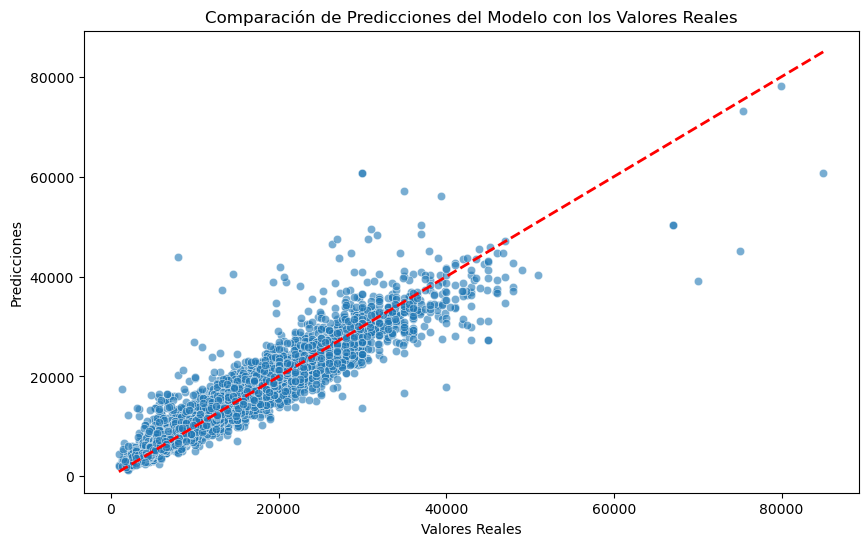

In [10]:
# Visualizamos la predicción del modelo 
# (la linea roja simboliza la situación en que las predicciones del modelo son iguales a los precios reales de test)
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión de las predicciones del modelo versus los valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones del Modelo con los Valores Reales')
plt.show()

In [16]:
# Aplicamos k-Fold validation sobre el modelo optimizado para comparar los resultados con los datos de train y test, para ver si hay Overffiting

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Parámetros óptimos obtenidos de GridSearchCV
best_params = {
    'learning_rate': 0.15,
    'max_depth': 8,
    'min_child_weight': 0,
    'reg_lambda': 2.7,
    'max_bin': 512
}

# Crear el modelo optimizado con los mejores parámetros
optimized_model = XGBRegressor(**best_params)

# Definir el número de folds
n_splits = 10

# Crear el objeto KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Crear los scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Realizar la validación cruzada con el modelo optimizado
mse_scores = cross_val_score(optimized_model, X_train, y_train, scoring=mse_scorer, cv=kf, n_jobs=-1)
mae_scores = cross_val_score(optimized_model, X_train, y_train, scoring=mae_scorer, cv=kf, n_jobs=-1)
r2_scores = cross_val_score(optimized_model, X_train, y_train, scoring=r2_scorer, cv=kf, n_jobs=-1)
r2_adjusted_scores = 1 - (1 - r2_scores) * (n - 1) / (n - k - 1)

# Convertir los scores a positivos y calcular la media y la desviación estándar
mse_scores = -mse_scores  # Convertir a positivos
mae_scores = -mae_scores  # Convertir a positivos
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()
mean_r2_adj= r2_adjusted_scores.mean()
std_r2_adj = r2_adjusted_scores.std()

print("\nResultados del Conjunto de Entrenamiento:")
print(f'Media MSE: {mean_mse:.4f}')
print(f'Desviación Estándar MSE: {std_mse:.4f}')
print(f'Media MAE: {mean_mae:.4f}')
print(f'Desviación Estándar MAE: {std_mae:.4f}')
print(f'Media R2: {mean_r2:.4f}')
print(f'Desviación Estándar R2: {std_r2:.4f}')
print(f'Media R2 Adj: {mean_r2_adj:.4f}')
print(f'Desviación Estándar R2 Adj: {std_r2_adj:.4f}')

# Comparar los resultados de k-fold cross-validation con los resultados del conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_best)
mse_test = mean_squared_error(y_test, y_pred_best)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_best)
r2_adjusted_test = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)

print("\nResultados del Conjunto de Prueba:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2: {r2_test:.4f}")
print(f"R2 Adj: {r2_adjusted_test:.4f}")

# Comparar k-fold con resultados del test
print("\nComparación de k-fold con el conjunto de prueba:")
print(f"Media MAE k-fold: {mean_mae:.4f} vs. Test MAE: {mae_test:.4f}")
print(f"Media MSE k-fold: {mean_mse:.4f} vs. Test MSE: {mse_test:.4f}")
print(f"Media RMSE k-fold: {np.sqrt(mean_mse):.4f} vs. Test RMSE: {rmse_test:.4f}")
print(f"Media R2 k-fold: {mean_r2:.4f} vs. Test R2: {r2_test:.4f}")
print(f"Media R2 Adj k-fold: {mean_r2_adj:.4f} vs. Test R2: {r2_adjusted_test:.4f}")



Resultados del Conjunto de Entrenamiento:
Mean MSE: 9889032.4111
Standard Deviation MSE: 2244191.8446
Mean MAE: 1754.9291
Standard Deviation MAE: 51.8136
Mean R2: 0.8589
Standard Deviation R2: 0.0321
Mean R2 Adj: 0.8576
Standard Deviation R2 Adj: 0.0324

Resultados del Conjunto de Prueba:
MAE: 1717.6956
MSE: 7613823.5600
RMSE: 2759.3158
R2: 0.8786
R2 Adj: 0.8775

Comparación de k-fold con el conjunto de prueba:
Mean MAE k-fold: 1754.9291 vs. Test MAE: 1717.6956
Mean MSE k-fold: 9889032.4111 vs. Test MSE: 7613823.5600
Mean RMSE k-fold: 3144.6832 vs. Test RMSE: 2759.3158
Mean R2 k-fold: 0.8589 vs. Test R2: 0.8786
Mean R2 Adj k-fold: 0.8576 vs. Test R2: 0.8775


In [ ]:
# Vemos que con los datos de entrenamiento, y aplicando k-fold cross validation el modelo se ajusta en un 85,7% (+-3,2%)
# a los datos, mientras que al momento de predecir con respecto a los datos de test, el mismo tiene una efectividad del 
# 87,7% con la semilla 0, sin embargo no hay que preocuparnos por la diferencia en el rendimiento si cambiamos la semilla, 
# ya que la baja desviación estándar en el entrenamiento nos indica que los resultados no han de variar en una cuantía mayor 
# al 4% en test, dado el gran conjunto de datos que le hemos proporcionado al modelo y lo homogéneo que le resulta al mismo ambos sets.

# Tampoco debemos preocuparnos por un caso de Overffiting, ya que el modelo ajusta mejor incluso con los datos de test
# que con respecto a los datos de train, siendo la discrepancia insignificante para considerarlo Underffiting